In [1]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib

In [2]:
# encode the query using a library

columns = [
    "Barometer_altitude",
    "Barometer_latitude",
    "Barometer_longitude",
    "Barometer_pressure",
    "Barometer_relativeAltitude",
    "Barometer_x",
    "Barometer_y",
    "Barometer_z"
]
query = "SELECT " + (", ".join([f"COUNT({column}) as {column}" for column in columns])) + " FROM prod"

response = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query={urllib.parse.quote(query)}")
pd.read_csv(io.StringIO(response.text)).T

,0
Barometer_altitude,0
Barometer_latitude,0
Barometer_longitude,0
Barometer_pressure,266672
Barometer_relativeAltitude,266672
Barometer_x,0
Barometer_y,0
Barometer_z,0


Nur die Spalten Barometer_pressure und Barometer_relativeAltitude haben Daten. Alle anderen Spalten sind leer.

In [3]:
def get_df(person = None, activity = None):
    where_clause = "WHERE Barometer_pressure IS NOT NULL OR Barometer_relativeAltitude IS NOT NULL"
    if person is not None:
        where_clause += f" AND person = '{person}'"
    if activity is not None:
        where_clause += f" AND activity = '{activity}'"
    r = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query=SELECT timestamp, Barometer_pressure, Barometer_relativeAltitude, filename, person, activity, hash FROM prod {where_clause}")
    pData = pd.read_csv(io.StringIO(r.text), parse_dates=['timestamp'])
    return pData.set_index('timestamp', drop=True)

In [4]:
df = get_df()

In [5]:
df.sample(5)

,Barometer_pressure,Barometer_relativeAltitude,filename,person,activity,hash
timestamp,,,,,,
2023-03-12 13:28:05.490000+00:00,946.483398,-5.073181,03_GalaxyS21,Tobias_Buess,Rennen,c2a0f1958c7840c493744c971e844f90
2023-03-13 11:59:00.220000+00:00,966.693420,4.114014,03_Pixel6_2023-03-13_11-57-49,Florin_Barbisch,Treppenlaufen,ecdfd34606b140049fb2de2b3898d6f8
2023-03-12 13:19:48.170000+00:00,946.279297,9.160767,04_GalaxyS21,Tobias_Buess,Laufen,a51b6bceabbf49dca44c4b1406232cdf
2023-02-23 17:31:25.630000+00:00,960.994446,8.328430,01Pixel6,Florin_Barbisch,Velofahren,4221e5c98233432ba1ae62380dd1cea3
2023-02-24 17:44:12.420000+00:00,952.194458,16.651642,01_Pixel6-2023-02-24_17-31-22,Florin_Barbisch,Laufen,4eb98a019979402c87f4e0038a8ccf45


In [6]:
# summarize the data
df.describe()

,Barometer_pressure,Barometer_relativeAltitude
count,266672.000000,266672.000000
mean,956.905202,1.635954
std,8.753390,11.269911
min,921.619141,-142.807007
25%,951.156860,-0.887817
50%,955.943542,0.478256
75%,962.106018,5.831482
max,987.392578,41.309998


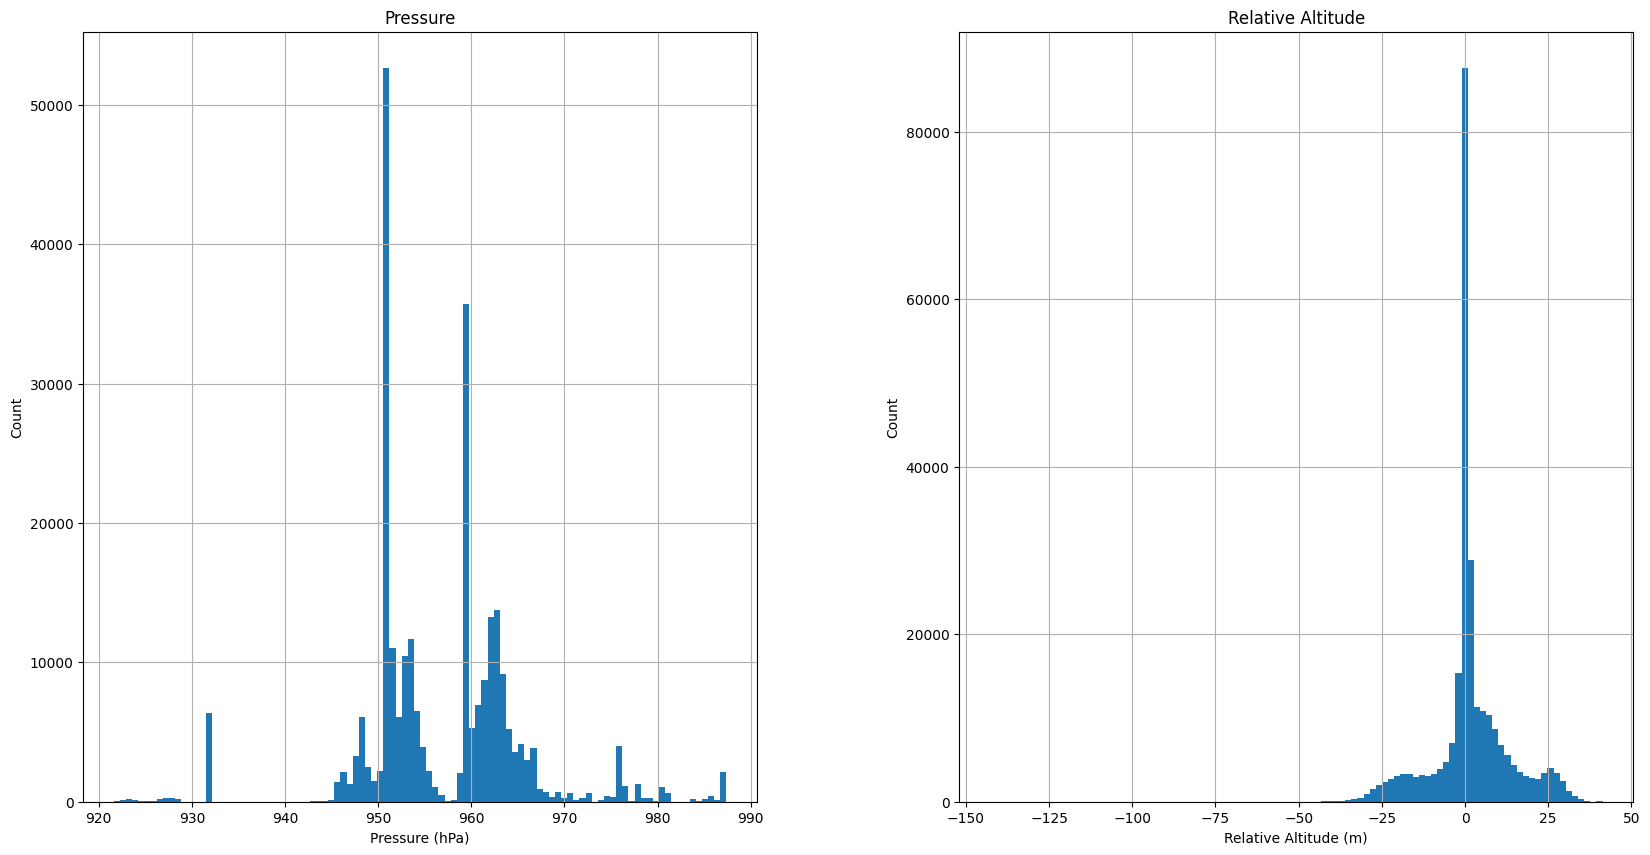

In [7]:
# plot distribution of pressure and relative altitude
# make figure bigger and create 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
df.hist(column=['Barometer_pressure', 'Barometer_relativeAltitude'], bins=100, ax=axs)
axs[0].set_title('Pressure')
axs[0].set_xlabel('Pressure (hPa)')
axs[0].set_ylabel('Count')
axs[1].set_title('Relative Altitude')
axs[1].set_xlabel('Relative Altitude (m)')
axs[1].set_ylabel('Count')

plt.show()

In [8]:
# get unique values each activity and person
activities = df['activity'].unique()
people = df['person'].unique()

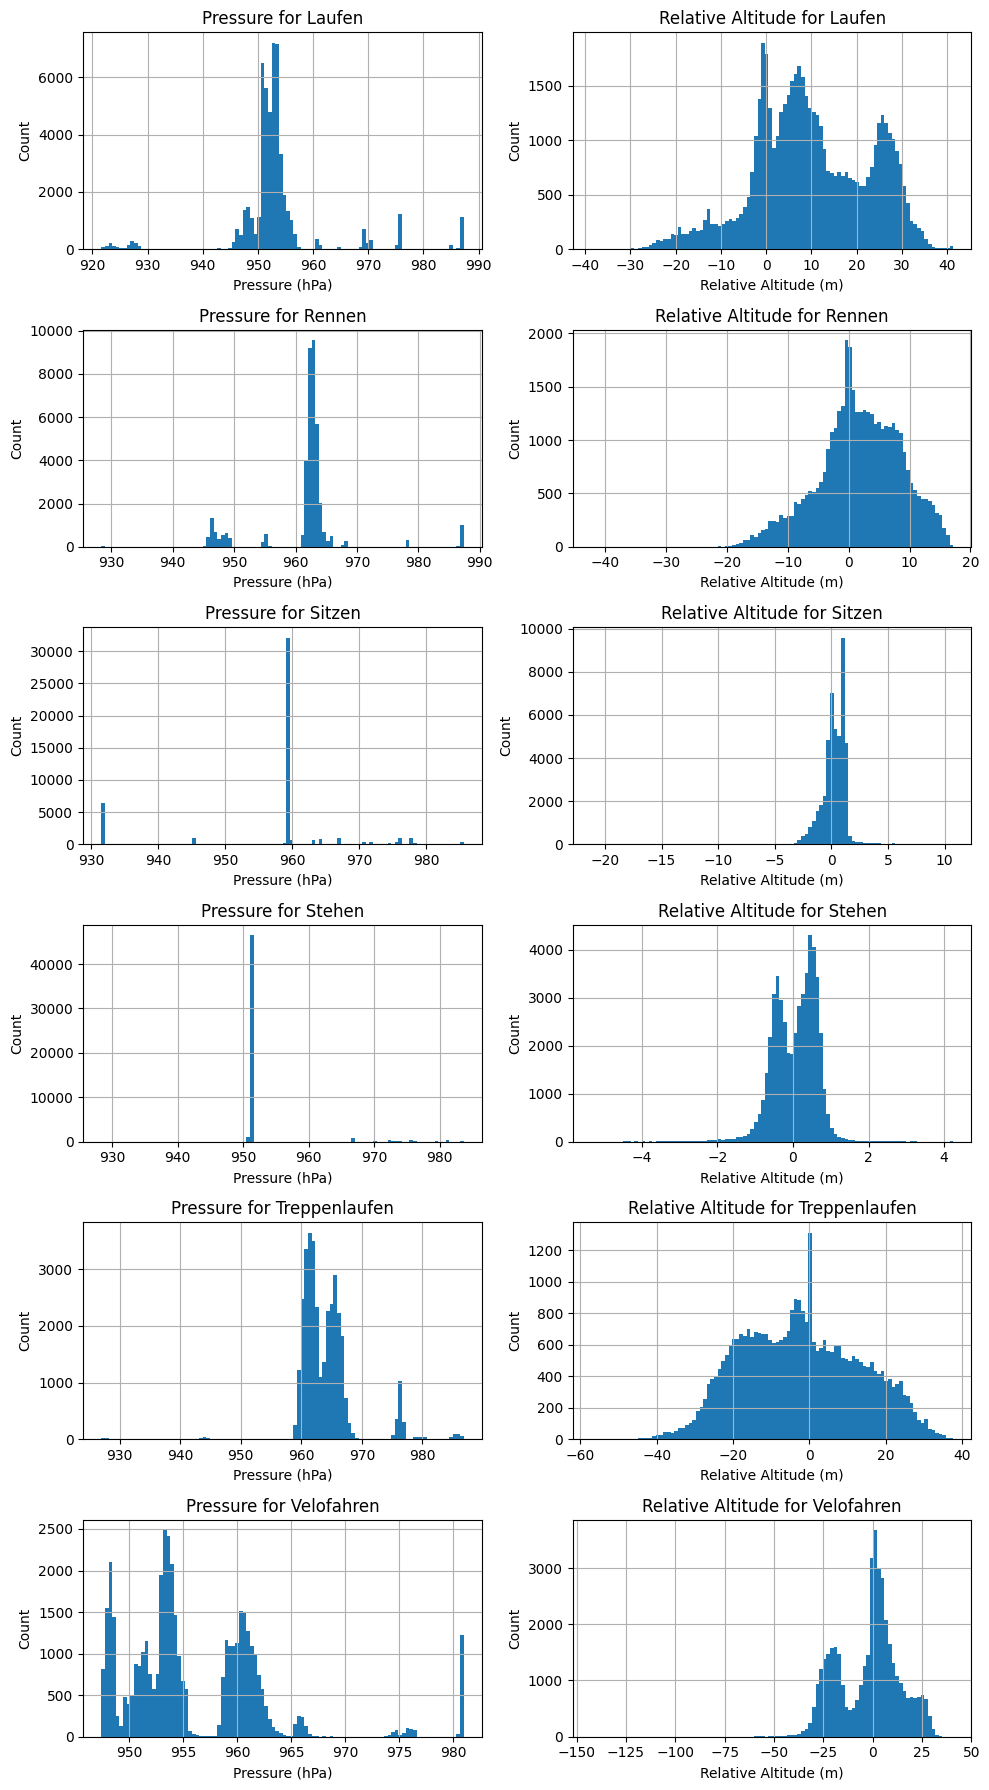

In [11]:
# create histogram for each activity 
fig, axs = plt.subplots(len(activities), 2, figsize=(10, 3 * len(activities)))
for i, activity in enumerate(activities):
    df[df['activity'] == activity].hist(column=['Barometer_pressure', 'Barometer_relativeAltitude'], bins=100, ax=axs[i])
    axs[i][0].set_title(f"Pressure for {activity}")
    axs[i][0].set_xlabel('Pressure (hPa)')
    axs[i][0].set_ylabel('Count')
    axs[i][1].set_title(f"Relative Altitude for {activity}")
    axs[i][1].set_xlabel('Relative Altitude (m)')
    axs[i][1].set_ylabel('Count')
plt.tight_layout()
plt.show()

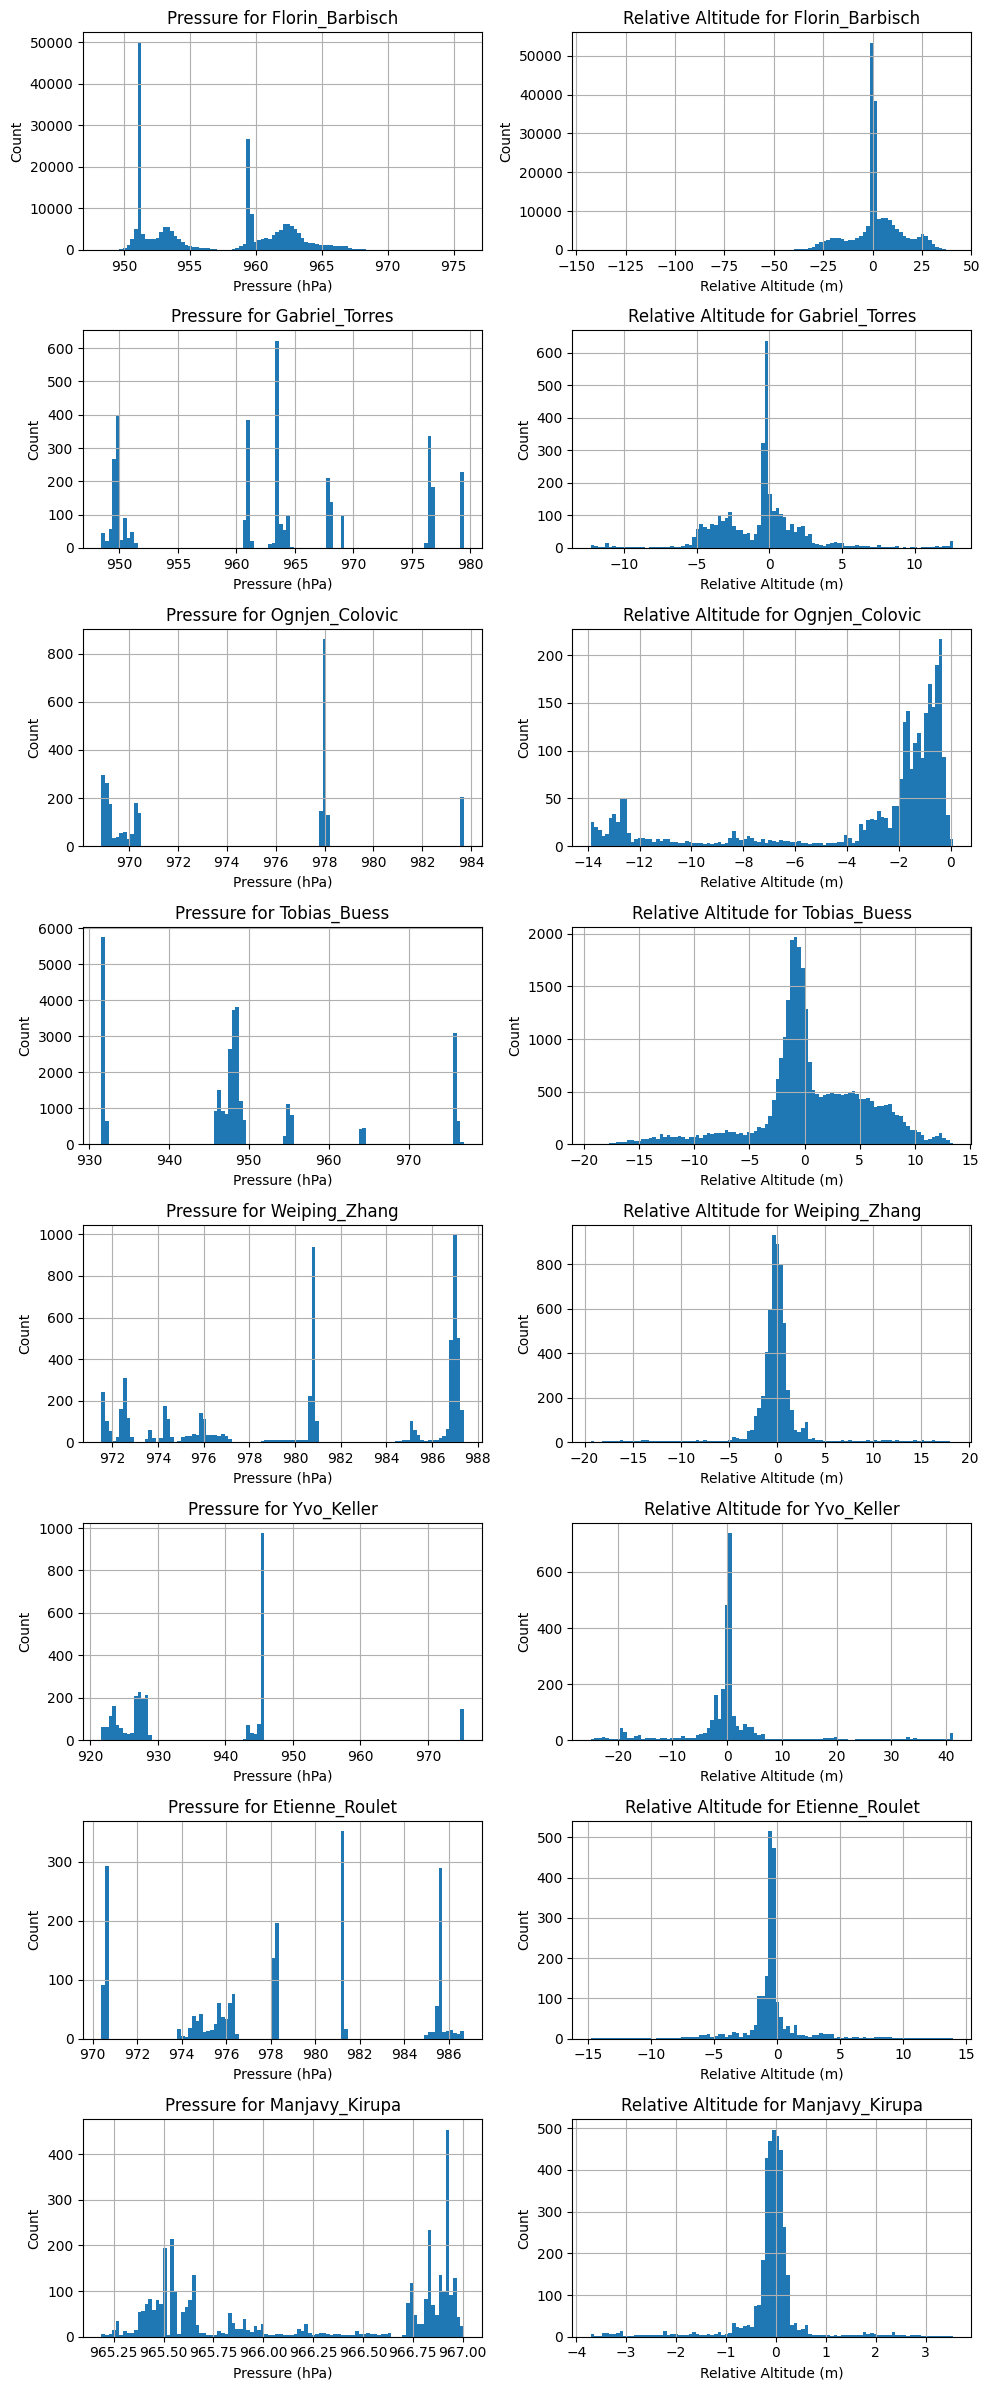

In [12]:
# create histogram for each person
fig, axs = plt.subplots(len(people), 2, figsize=(10, 3 * len(people)))
for i, person in enumerate(people):
    df[df['person'] == person].hist(column=['Barometer_pressure', 'Barometer_relativeAltitude'], bins=100, ax=axs[i])
    axs[i][0].set_title(f"Pressure for {person}")
    axs[i][0].set_xlabel('Pressure (hPa)')
    axs[i][0].set_ylabel('Count')
    axs[i][1].set_title(f"Relative Altitude for {person}")
    axs[i][1].set_xlabel('Relative Altitude (m)')
    axs[i][1].set_ylabel('Count')
plt.tight_layout()
plt.show()

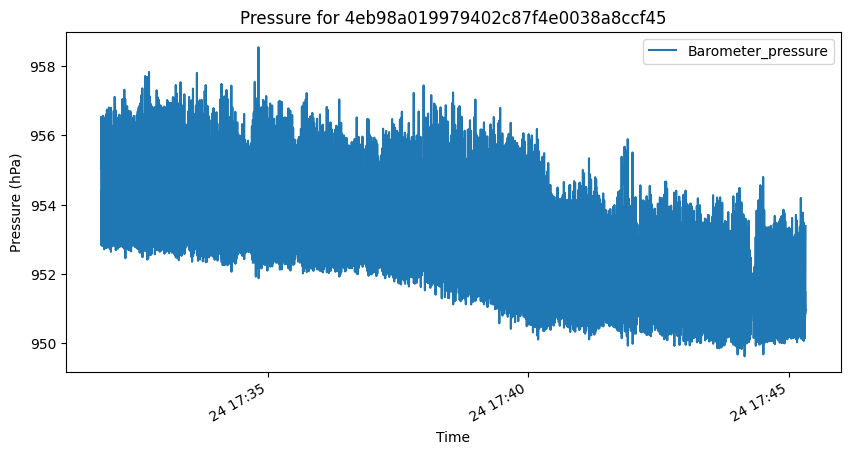

C:\Users\flori\AppData\Local\Temp\ipykernel_7524\647639949.py:9: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['activity', 'filename', 'hash', 'person'], dtype='object')
  df[df['hash'] == hash].rolling(500).mean().plot(y=['Barometer_pressure'], figsize=(10, 5))


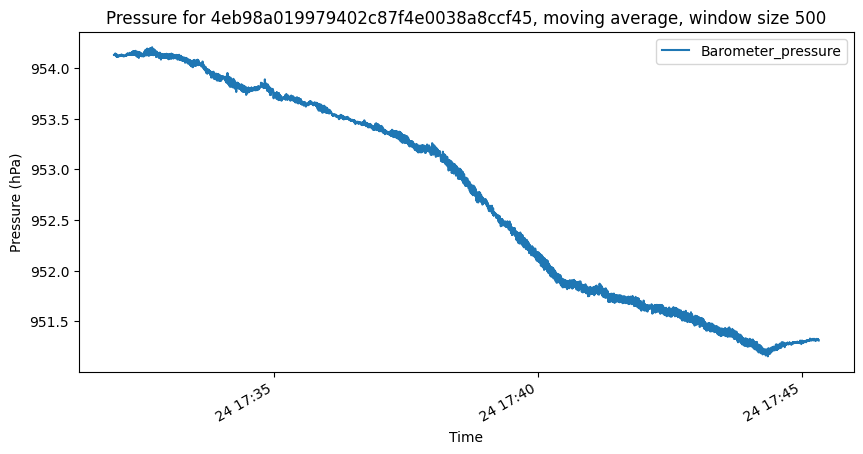

C:\Users\flori\AppData\Local\Temp\ipykernel_7524\647639949.py:14: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['activity', 'filename', 'hash', 'person'], dtype='object')
  df[df['hash'] == hash].rolling(3000).mean().plot(y=['Barometer_pressure'], figsize=(10, 5))


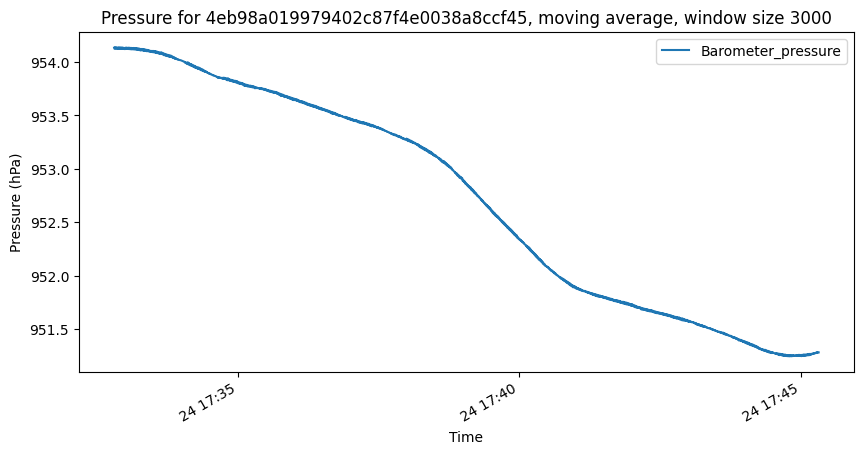

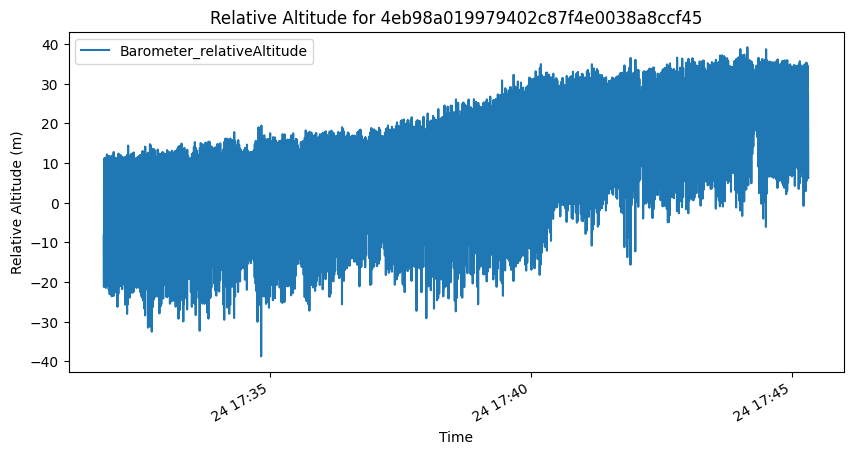

C:\Users\flori\AppData\Local\Temp\ipykernel_7524\647639949.py:25: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['activity', 'filename', 'hash', 'person'], dtype='object')
  df[df['hash'] == hash].rolling(500).mean().plot(y=['Barometer_relativeAltitude'], figsize=(10, 5))


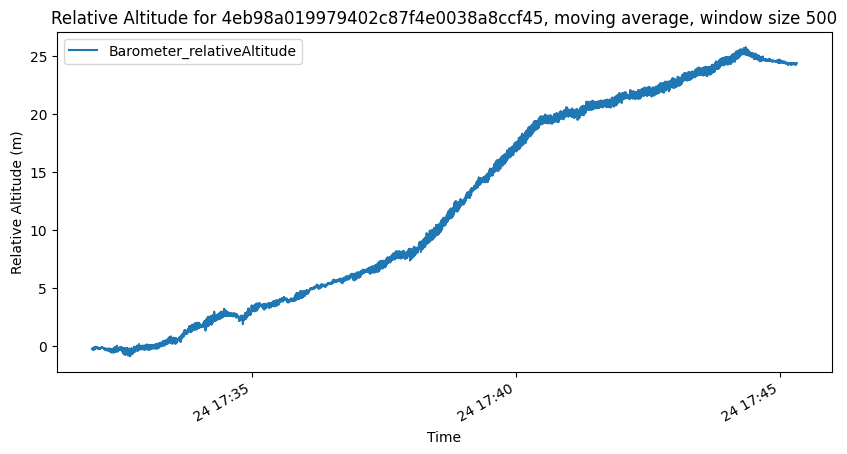

C:\Users\flori\AppData\Local\Temp\ipykernel_7524\647639949.py:30: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['activity', 'filename', 'hash', 'person'], dtype='object')
  df[df['hash'] == hash].rolling(3000).mean().plot(y=['Barometer_relativeAltitude'], figsize=(10, 5))


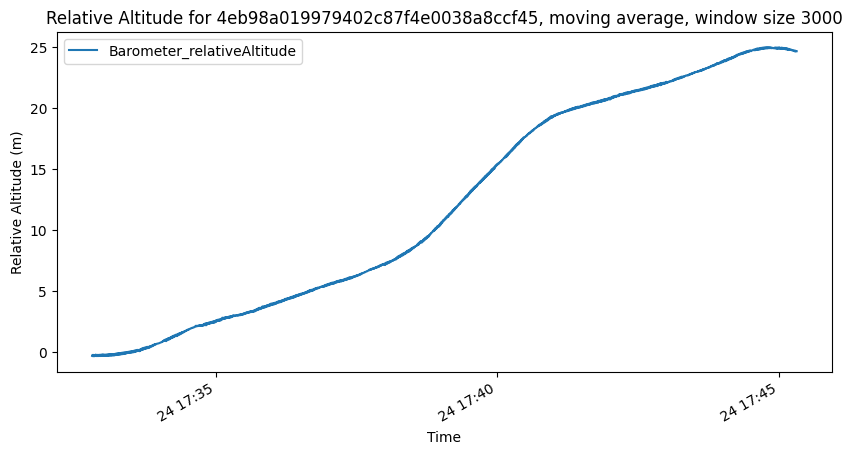

In [13]:
# visualize the data of the first hash
hash = df['hash'].unique()[0]
df[df['hash'] == hash].plot(y=['Barometer_pressure'], figsize=(10, 5))
plt.title(f"Pressure for {hash}")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time')
plt.show()
# add a moving average
df[df['hash'] == hash].rolling(500).mean().plot(y=['Barometer_pressure'], figsize=(10, 5))
plt.title(f"Pressure for {hash}, moving average, window size 500")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time')
plt.show()
df[df['hash'] == hash].rolling(3000).mean().plot(y=['Barometer_pressure'], figsize=(10, 5))
plt.title(f"Pressure for {hash}, moving average, window size 3000")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time')
plt.show()

df[df['hash'] == hash].plot(y=['Barometer_relativeAltitude'], figsize=(10, 5))
plt.title(f"Relative Altitude for {hash}")
plt.ylabel('Relative Altitude (m)')
plt.xlabel('Time')
plt.show()
df[df['hash'] == hash].rolling(500).mean().plot(y=['Barometer_relativeAltitude'], figsize=(10, 5))
plt.title(f"Relative Altitude for {hash}, moving average, window size 500")
plt.ylabel('Relative Altitude (m)')
plt.xlabel('Time')
plt.show()
df[df['hash'] == hash].rolling(3000).mean().plot(y=['Barometer_relativeAltitude'], figsize=(10, 5))
plt.title(f"Relative Altitude for {hash}, moving average, window size 3000")
plt.ylabel('Relative Altitude (m)')
plt.xlabel('Time')
plt.show()


Das Ergebnis wird erst stabil, wenn wir einen Moving Average von einer Minute anwenden.

In [12]:
# create individual dataframes for each hash
dfs_by_hash = {}
frequencies = {}
for hash in df['hash'].unique():
    dfs_by_hash[hash] = df[df['hash'] == hash]
    frequencies[hash] = dfs_by_hash[hash].index.to_series().diff().value_counts().sort_index()


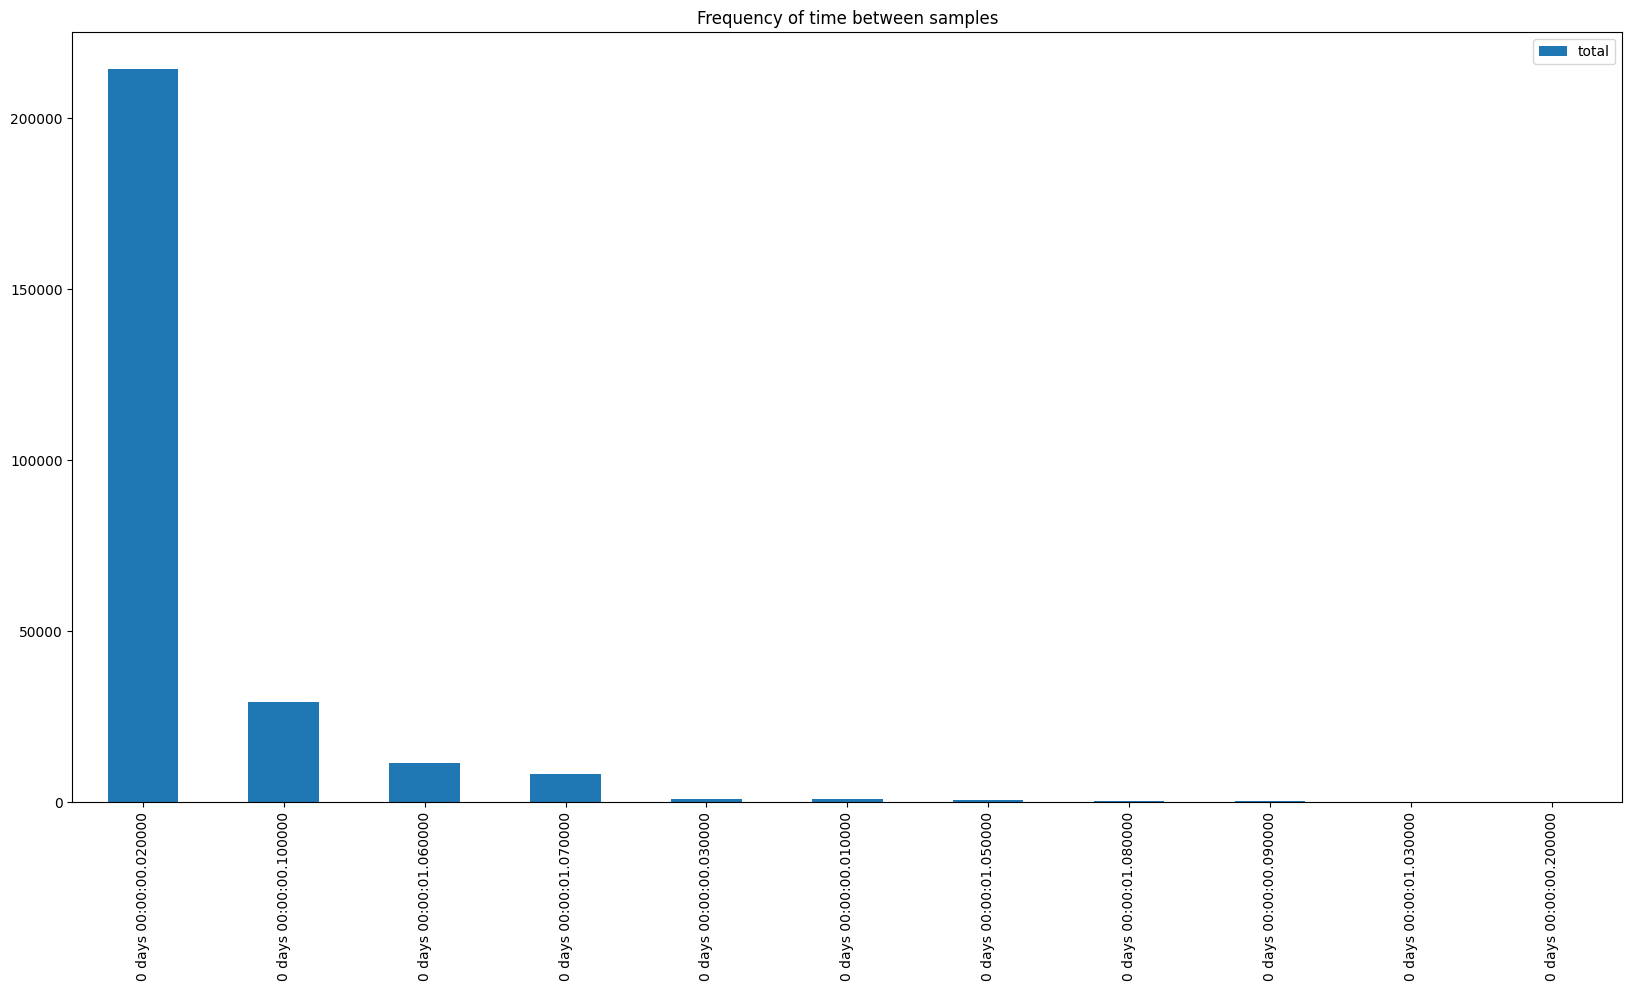

In [13]:
# combine all frequencies into one dataframe
frequencies_df = pd.DataFrame(frequencies).fillna(0).astype(int)
# summ all hash columns
frequencies_df['total'] = frequencies_df.sum(axis=1)
# drop hash columns
frequencies_df = frequencies_df.drop(columns=frequencies_df.columns[:-1])
# sort by total
frequencies_df = frequencies_df.sort_values(by=['total'], ascending=False)
# filter out rows with less than 0.1% of the total
frequencies_df = frequencies_df[frequencies_df['total'] > frequencies_df['total'].sum() * 0.0001]
# plot
frequencies_df.plot.bar(figsize=(20, 10), title="Frequency of time between samples")
plt.show()

Die meisten Messungen haben eine Samplingfrequency von 50Hz, am zweitmeisten sind 10Hz und am dritthäufigsten 0.9375Hz.